# **LAB ASSIGNMENT - 1** : MNIST Dataset Classification using Decision Trees

**Step 1: Load and Explore the Dataset**

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


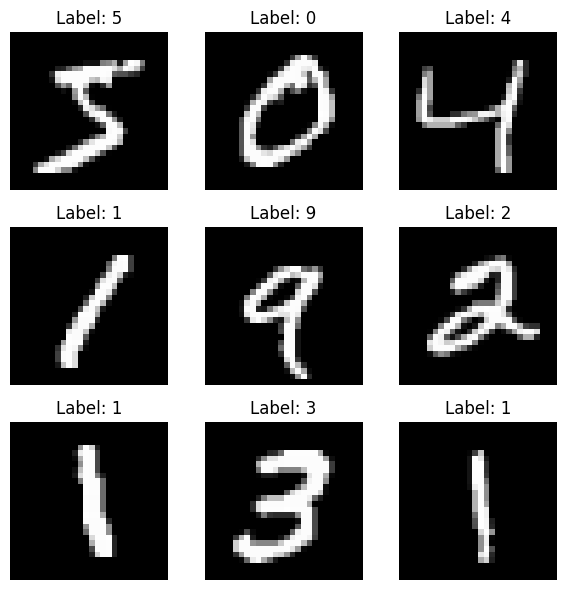

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Unique labels:", np.unique(y_train))

# Visualize few images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


**2. Step 2: Preprocessing the Data**

In [ ]:
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], 28*28)
X_test_flat  = X_test.reshape(X_test.shape[0], 28*28)

# Normalize
X_train_flat = X_train_flat / 255.0
X_test_flat  = X_test_flat / 255.0

print("After flattening:", X_train_flat.shape)
print("After normalization: min =", X_train_flat.min(), "max =", X_train_flat.max())


After flattening: (60000, 784)
After normalization: min = 0.0 max = 1.0


**Step 3: Split the Data**

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load and preprocess
(X_train, y_train), _ = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0

# Train-test split
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training subset shape:", X_train_sub.shape)
print("Validation shape:", X_val.shape)

Training subset shape: (48000, 784)
Validation shape: (12000, 784)


**Step 4: Build and Train the Model**

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load & preprocess
(X_train, y_train), _ = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0

# Split
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train, y_train, test_size=0.7, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_sub, y_train_sub)

print("Decision Tree model trained successfully")

Decision Tree model trained successfully


**Step 5: Evaluate the Model**

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0
X_test  = X_test.reshape(X_test.shape[0], 28*28) / 255.0

# Train on subset
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train, y_train, test_size=0.7, random_state=4)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_sub, y_train_sub)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.838
